In [127]:
import pandas as pd
import numpy as np
from numpy import concatenate
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [2]:
#連上Finmind取得及時的數據
url = "https://api.finmindtrade.com/api/v4/login"
parload = {
    "user_id": "aaron_lin",
    "password": "6608Gk61221",
}
data = requests.post(url, data=parload)
data=data.json()
my_token=data['token']

In [258]:
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockPrice",
    "data_id": "2603",
    "start_date": "2016-06-04",
    "end_date": "2021-06-04",
    "token":my_token # 參考登入，獲取金鑰
}
resp = requests.get(url, params=parameter)
data = resp.json()
df = pd.DataFrame(data["data"])
name=df.iat[0,1]
print(name)
df

2603


,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
0,2016-06-04,2603,4041260,48297858,11.75,12.05,11.75,12.00,0.25,1293
1,2016-06-06,2603,2982018,35181953,12.00,12.00,11.70,11.75,-0.25,1227
2,2016-06-07,2603,7022057,83013360,11.85,11.90,11.75,11.85,0.10,2135
3,2016-06-08,2603,9126369,109609132,11.80,12.20,11.80,12.15,0.30,2996
4,2016-06-13,2603,4856364,57869583,12.10,12.15,11.80,11.85,-0.30,1791
...,...,...,...,...,...,...,...,...,...,...
1218,2021-05-31,2603,670726907,67815520019,99.50,105.50,96.60,98.60,2.20,248315
1219,2021-06-01,2603,542547770,55984576106,101.50,108.00,98.20,108.00,9.40,196823
1220,2021-06-02,2603,696150855,78107414405,110.00,115.50,108.50,110.50,2.50,232375
1221,2021-06-03,2603,561492548,65330004183,114.00,121.00,112.50,119.00,8.50,185050


In [259]:
#取得個股的融資卷增減量(張) (data2)
parameter = {
    "dataset": "TaiwanStockMarginPurchaseShortSale",
    "data_id": "2603",
    "start_date": "2016-06-04",
    "token": my_token, # 參考登入，獲取金鑰
}
data2 = requests.get(url, params=parameter).json()
data2 = pd.DataFrame(data2['data'])
data2=data2[["MarginPurchaseTodayBalance","MarginPurchaseYesterdayBalance","ShortSaleTodayBalance","ShortSaleYesterdayBalance"]]
data2["MarginPurchaseVariation"]=data2["MarginPurchaseTodayBalance"]-data2["MarginPurchaseYesterdayBalance"]
data2["ShortSaleVariation"]=data2["ShortSaleTodayBalance"]-data2["ShortSaleYesterdayBalance"]
data2

#data2=data2.drop(1222,axis=0)
data2

,MarginPurchaseTodayBalance,MarginPurchaseYesterdayBalance,ShortSaleTodayBalance,ShortSaleYesterdayBalance,MarginPurchaseVariation,ShortSaleVariation
0,23736,23978,712,658,-242,54
1,23551,23736,686,712,-185,-26
2,23445,23551,680,686,-106,-6
3,23224,23445,721,680,-221,41
4,23186,23224,684,721,-38,-37
...,...,...,...,...,...,...
1218,315497,319856,30408,30160,-4359,248
1219,352092,315497,33895,30408,36595,3487
1220,328326,352092,31775,33895,-23766,-2120
1221,338216,328326,33326,31775,9890,1551


In [260]:
#取得個股的股利,本益比,淨值比(data3)
parameter = {
    "dataset": "TaiwanStockPER",
    "data_id": "2603",
    "start_date": "2016-06-04",
    "token": my_token, # 參考登入，獲取金鑰
}
data3 = requests.get(url, params=parameter).json()
data3
data3 = pd.DataFrame(data3['data'])
data3=data3.drop(["date","stock_id"],axis=1)

#data3=data3.drop(1222,axis=0)
data3

,dividend_yield,PER,PBR
0,1.67,0.00,0.78
1,1.70,0.00,0.76
2,1.69,0.00,0.77
3,1.65,0.00,0.79
4,1.69,0.00,0.77
...,...,...,...
1218,2.54,8.46,3.74
1219,2.31,9.26,4.09
1220,2.26,9.48,4.19
1221,2.10,10.21,4.51


In [261]:
#取得大盤的融資餘額(百萬)以及融卷張數 (data4)
parameter = {
    "dataset": "TaiwanStockTotalMarginPurchaseShortSale",
    "start_date": "2016-06-04",
    "token": my_token, # 參考登入，獲取金鑰
}
data4 = requests.get(url, params=parameter).json()
data4 = pd.DataFrame(data4['data'])[["TodayBalance","name"]]
data4=data4[~data4['name'].isin(["MarginPurchase"])]
MarginPurchaseMoney=data4[data4["name"]=="MarginPurchaseMoney"].drop(columns="name")
MarginPurchaseMoney.rename(columns={"TodayBalance":"MarginPurchaseMoney"})
MarginPurchaseMoney=MarginPurchaseMoney["TodayBalance"]/10000000
MarginPurchaseMoney=MarginPurchaseMoney.to_frame().rename(columns={"TodayBalance":"MarginPurchaseMoney"})
ShortSale=data4[data4["name"]=="ShortSale"].drop(columns="name")
ShortSale=ShortSale.rename(columns={"TodayBalance":"Shortsale"})
mod=list(range(len(df)))
MarginPurchaseMoney=MarginPurchaseMoney.set_axis(mod)
ShortSale=ShortSale.set_axis(mod)
data4=MarginPurchaseMoney.join(ShortSale)
data4

#data4=data4.drop(1222,axis=0)
data4

,MarginPurchaseMoney,Shortsale
0,12994.9943,360288
1,12967.5393,368731
2,12935.2080,379136
3,12945.7301,378743
4,12925.4617,355334
...,...,...
1218,23404.7805,551036
1219,24012.6099,563095
1220,24049.8196,550856
1221,24595.8470,559529


In [262]:
#大盤指數,與漲跌點數
data5 = pd.read_csv('TAIEX.csv')
data5=data5.iloc[::-1]
mod=list(range(len(df)))
data5=data5.set_axis(mod).drop(["Date","Return",'Percent'],axis=1)
data5.columns = ['大盤指數','漲跌點數']
data5

,大盤指數,漲跌點數
0,8591.57,4.21
1,8597.11,5.54
2,8679.90,82.79
3,8715.48,35.58
4,8536.22,-179.26
...,...,...
1218,17068.43,197.57
1219,17162.38,93.95
1220,17165.04,2.66
1221,17246.16,81.12


In [263]:
#將多張dataframe合併
df=df.join(data2)
df=df.join(data3)
df=df.join(data4)
df=df.join(data5)
df

,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover,...,ShortSaleYesterdayBalance,MarginPurchaseVariation,ShortSaleVariation,dividend_yield,PER,PBR,MarginPurchaseMoney,Shortsale,大盤指數,漲跌點數
0,2016-06-04,2603,4041260,48297858,11.75,12.05,11.75,12.00,0.25,1293,...,658,-242,54,1.67,0.00,0.78,12994.9943,360288,8591.57,4.21
1,2016-06-06,2603,2982018,35181953,12.00,12.00,11.70,11.75,-0.25,1227,...,712,-185,-26,1.70,0.00,0.76,12967.5393,368731,8597.11,5.54
2,2016-06-07,2603,7022057,83013360,11.85,11.90,11.75,11.85,0.10,2135,...,686,-106,-6,1.69,0.00,0.77,12935.2080,379136,8679.90,82.79
3,2016-06-08,2603,9126369,109609132,11.80,12.20,11.80,12.15,0.30,2996,...,680,-221,41,1.65,0.00,0.79,12945.7301,378743,8715.48,35.58
4,2016-06-13,2603,4856364,57869583,12.10,12.15,11.80,11.85,-0.30,1791,...,721,-38,-37,1.69,0.00,0.77,12925.4617,355334,8536.22,-179.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,2021-05-31,2603,670726907,67815520019,99.50,105.50,96.60,98.60,2.20,248315,...,30160,-4359,248,2.54,8.46,3.74,23404.7805,551036,17068.43,197.57
1219,2021-06-01,2603,542547770,55984576106,101.50,108.00,98.20,108.00,9.40,196823,...,30408,36595,3487,2.31,9.26,4.09,24012.6099,563095,17162.38,93.95
1220,2021-06-02,2603,696150855,78107414405,110.00,115.50,108.50,110.50,2.50,232375,...,33895,-23766,-2120,2.26,9.48,4.19,24049.8196,550856,17165.04,2.66
1221,2021-06-03,2603,561492548,65330004183,114.00,121.00,112.50,119.00,8.50,185050,...,31775,9890,1551,2.10,10.21,4.51,24595.8470,559529,17246.16,81.12


In [264]:
df.columns=["日期","股票編號","當日成交量","當日成交金額","開盤價","最高價","最低價","收盤價","買賣價差","周轉率","當日融資","昨日融資","當日融卷","昨日融卷","融資變化","融卷變化","殖利率","本益比","股價淨值比","大盤融資餘額(百萬)","大盤融卷量","大盤指數","大盤漲跌"]
df=df.drop("股票編號",axis=1)
df.set_index(["日期"], inplace=True)
df.insert(loc=0,column="price",value=df["收盤價"].tolist())
df=df.drop("收盤價",axis=1)

In [265]:
df

,price,當日成交量,當日成交金額,開盤價,最高價,最低價,買賣價差,周轉率,當日融資,昨日融資,...,昨日融卷,融資變化,融卷變化,殖利率,本益比,股價淨值比,大盤融資餘額(百萬),大盤融卷量,大盤指數,大盤漲跌
日期,,,,,,,,,,,,,,,,,,,,,
2016-06-04,12.00,4041260,48297858,11.75,12.05,11.75,0.25,1293,23736,23978,...,658,-242,54,1.67,0.00,0.78,12994.9943,360288,8591.57,4.21
2016-06-06,11.75,2982018,35181953,12.00,12.00,11.70,-0.25,1227,23551,23736,...,712,-185,-26,1.70,0.00,0.76,12967.5393,368731,8597.11,5.54
2016-06-07,11.85,7022057,83013360,11.85,11.90,11.75,0.10,2135,23445,23551,...,686,-106,-6,1.69,0.00,0.77,12935.2080,379136,8679.90,82.79
2016-06-08,12.15,9126369,109609132,11.80,12.20,11.80,0.30,2996,23224,23445,...,680,-221,41,1.65,0.00,0.79,12945.7301,378743,8715.48,35.58
2016-06-13,11.85,4856364,57869583,12.10,12.15,11.80,-0.30,1791,23186,23224,...,721,-38,-37,1.69,0.00,0.77,12925.4617,355334,8536.22,-179.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,98.60,670726907,67815520019,99.50,105.50,96.60,2.20,248315,315497,319856,...,30160,-4359,248,2.54,8.46,3.74,23404.7805,551036,17068.43,197.57
2021-06-01,108.00,542547770,55984576106,101.50,108.00,98.20,9.40,196823,352092,315497,...,30408,36595,3487,2.31,9.26,4.09,24012.6099,563095,17162.38,93.95
2021-06-02,110.50,696150855,78107414405,110.00,115.50,108.50,2.50,232375,328326,352092,...,33895,-23766,-2120,2.26,9.48,4.19,24049.8196,550856,17165.04,2.66


In [266]:
for column in df:
    print(column,":",end="")
    print(df[column].rolling(10).corr(df['price']).mean(),"& ",end="")
    print(df[column].rolling(20).corr(df['price']).mean(),"& ",end="")
    print(df[column].rolling(30).corr(df['price']).mean(),"& ",end="")
    print(df[column].rolling(50).corr(df['price']).mean())

price :1.0000000000051796 & 0.9999999999961722 & 0.9999999999997375 & 0.9999999999995445
當日成交量 :0.169705568125493 & 0.2463755458301665 & 0.29660888950045394 & 0.33115601400930944
當日成交金額 :0.2199938376455831 & 0.31068912241939217 & 0.36740514025400517 & 0.40867129241678674
開盤價 :0.6671627849793387 & 0.829922206228708 & 0.8886594174081157 & 0.9328829474689031
最高價 :0.8682143148006782 & 0.9374200927981097 & 0.9598627273082422 & 0.9752712656509885
最低價 :0.8635759131030233 & 0.9287555134822981 & 0.9528199536860383 & 0.9712020092208633
買賣價差 :0.4300778273361906 & 0.31564607326055777 & 0.26260578778888327 & 0.21220011223903348
周轉率 :0.1664757846587491 & 0.24758247796262542 & 0.3004545750073118 & 0.3439756483595271
當日融資 :-0.035278399213705514 & 0.02261057879275902 & 0.05775435910884747 & 0.11896676835718546
昨日融資 :-0.023724706936977848 & 0.03844368436499806 & 0.0680066969912283 & 0.12401261409887293
當日融卷 :0.40079953811229313 & 0.3862712020046081 & 0.36023812817024153 & 0.3381299947010409
昨日融卷 :0.2626

In [267]:
#將相關係數與price正相關的作為自變量
df_new=df.drop(["當日成交量","當日成交金額","周轉率","當日融資","昨日融資","當日融卷","昨日融卷","殖利率"],axis=1)
df_new

,price,開盤價,最高價,最低價,買賣價差,融資變化,融卷變化,本益比,股價淨值比,大盤融資餘額(百萬),大盤融卷量,大盤指數,大盤漲跌
日期,,,,,,,,,,,,,
2016-06-04,12.00,11.75,12.05,11.75,0.25,-242,54,0.00,0.78,12994.9943,360288,8591.57,4.21
2016-06-06,11.75,12.00,12.00,11.70,-0.25,-185,-26,0.00,0.76,12967.5393,368731,8597.11,5.54
2016-06-07,11.85,11.85,11.90,11.75,0.10,-106,-6,0.00,0.77,12935.2080,379136,8679.90,82.79
2016-06-08,12.15,11.80,12.20,11.80,0.30,-221,41,0.00,0.79,12945.7301,378743,8715.48,35.58
2016-06-13,11.85,12.10,12.15,11.80,-0.30,-38,-37,0.00,0.77,12925.4617,355334,8536.22,-179.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,98.60,99.50,105.50,96.60,2.20,-4359,248,8.46,3.74,23404.7805,551036,17068.43,197.57
2021-06-01,108.00,101.50,108.00,98.20,9.40,36595,3487,9.26,4.09,24012.6099,563095,17162.38,93.95
2021-06-02,110.50,110.00,115.50,108.50,2.50,-23766,-2120,9.48,4.19,24049.8196,550856,17165.04,2.66


In [268]:
#將資料標準化
from sklearn.preprocessing import MinMaxScaler 
values = df_new.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(scaled)
scaled.shape[0],scaled.shape[1]

[[0.02638763 0.02366864 0.02572548 ... 0.17531891 0.01452332 0.47088767]
 [0.02411283 0.02594447 0.0252804  ... 0.18363432 0.01512964 0.47178086]
 [0.02502275 0.02457897 0.02439024 ... 0.19388207 0.02419057 0.52365922]
 ...
 [0.92265696 0.9180701  0.94659071 ... 0.36300702 0.95284463 0.46984675]
 [1.         0.95448339 0.99554923 ... 0.37154895 0.96172279 0.52253771]
 [0.97725205 1.         1.         ... 0.37461392 0.95091512 0.40174338]]


(1223, 13)

In [269]:
#將時間序列轉換為監督式學習
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# specify the number of lag hours
n_days = 10 #可再調整
n_features = df_new.shape[1]
# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)
reframed

,var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var6(t-10),var7(t-10),var8(t-10),var9(t-10),var10(t-10),...,var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t)
10,0.026388,0.023669,0.025725,0.026611,0.515873,0.453699,0.562206,0.000000,0.041131,0.216743,...,0.028011,0.505291,0.455038,0.562020,0.000000,0.041131,0.215691,0.167777,0.024732,0.507636
11,0.024113,0.025944,0.025280,0.026144,0.489418,0.454455,0.561376,0.000000,0.035990,0.215251,...,0.028945,0.518519,0.457133,0.562621,0.000000,0.046272,0.217775,0.161561,0.028169,0.489148
12,0.025023,0.024579,0.024390,0.026611,0.507937,0.455503,0.561584,0.000000,0.038560,0.213494,...,0.029879,0.492063,0.459653,0.561408,0.000000,0.043702,0.219316,0.162164,0.023838,0.441487
13,0.027753,0.024124,0.027061,0.027077,0.518519,0.453978,0.562071,0.000000,0.043702,0.214065,...,0.026611,0.481481,0.456775,0.560910,0.000000,0.035990,0.212193,0.142698,0.001983,0.333956
14,0.025023,0.026855,0.026616,0.027077,0.486772,0.456404,0.561262,0.000000,0.038560,0.212964,...,0.025210,0.505291,0.456219,0.561335,0.000000,0.038560,0.214689,0.142213,0.000000,0.455892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,0.491356,0.508421,0.541570,0.506069,0.132275,0.173031,0.564260,0.009748,0.455013,0.676792,...,0.818861,0.619048,0.399112,0.564219,0.015243,0.802057,0.782516,0.363184,0.942271,0.600741
1219,0.548681,0.533910,0.536229,0.525677,0.835979,0.624185,0.596668,0.010721,0.516710,0.685867,...,0.833800,1.000000,0.942124,0.597819,0.016685,0.892031,0.815551,0.375061,0.952554,0.531154
1220,0.611465,0.575785,0.597650,0.590103,0.867725,0.578202,0.610289,0.011784,0.583548,0.698734,...,0.929972,0.634921,0.141793,0.539654,0.017081,0.917738,0.817574,0.363007,0.952845,0.469847
1221,0.617834,0.611288,0.650169,0.617180,0.539683,0.317767,0.574665,0.011892,0.591260,0.687531,...,0.967320,0.952381,0.588040,0.577736,0.018396,1.000000,0.847250,0.371549,0.961723,0.522538


In [299]:
#用處理過後的二維數據進行train test切分
values = reframed.values
n_train_day = 1000
train = values[:n_train_day, :]
test = values[n_train_day:, :]

#split into input and outputs
n_obs = n_days * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1000, 10, 13) (1000,) (213, 10, 13) (213,)


Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_133 (LSTM)              (None, 50)                12800     
_________________________________________________________________
dropout_76 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 51        
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________
None


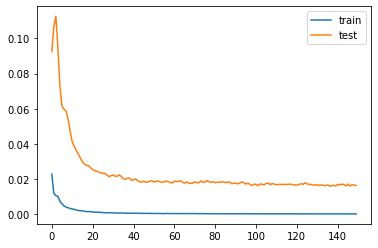

Test RMSE: 14.033
Test EVS : 0.792
Test r2: 0.665


In [297]:
#Design LSTM model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout,BatchNormalization

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

# fit network
history = model.fit(train_X, train_y, epochs=150, batch_size=256,validation_data=(test_X, test_y), verbose=0, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -12:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -12:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

evs = explained_variance_score(inv_y, inv_yhat)
print('Test EVS : %.3f' % evs)

r2=r2_score(inv_y,inv_yhat)
print('Test r2: %.3f' % r2)

Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_136 (LSTM)              (None, 10, 50)            12800     
_________________________________________________________________
dropout_79 (Dropout)         (None, 10, 50)            0         
_________________________________________________________________
lstm_137 (LSTM)              (None, 50)                20200     
_________________________________________________________________
dropout_80 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 51        
Total params: 33,051
Trainable params: 33,051
Non-trainable params: 0
_________________________________________________________________


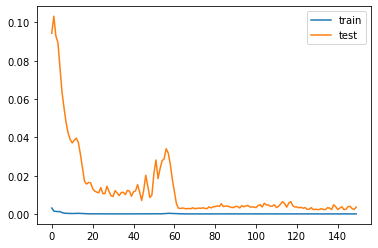

Test RMSE: 6.613
Test EVS : 0.936
Test r2: 0.926


In [300]:
###stacked LSTM

model=Sequential()
model.add(LSTM(50,input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(50,input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.4))
model.add(Dense(1))  
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

# fit network
history = model.fit(train_X, train_y, epochs=150, validation_data=(test_X, test_y), verbose=0, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -12:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -12:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
evs = explained_variance_score(inv_y, inv_yhat)
print('Test EVS : %.3f' % evs)
r2=r2_score(inv_y,inv_yhat)
print('Test r2: %.3f' % r2)

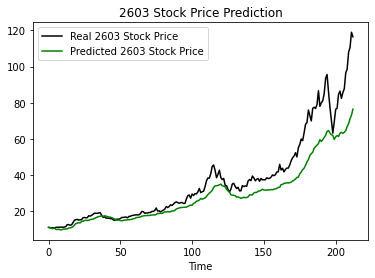

In [25]:
#用實際股價和預測的畫圖
plt.plot(inv_y, color = 'black', label = 'Real '+ name +' Stock Price ')
plt.plot(inv_yhat, color = 'green', label = 'Predicted '+name+ ' Stock Price')
plt.title(name+' Stock Price Prediction')
plt.xlabel('Time')
plt.legend()
plt.show()

In [24]:
#機器學習模型的評估 漲1,跌0,
def confusion_matrix_list(real,predict):
    real_tendency=[]
    predicted_tendency=[]
       
    for i in range(1,len(real)):
        if(real[i]-real[i-1]>0):
            real_tendency.append(1)
        if(real[i]-real[i-1]==0):
            real_tendency.append(2)
        if(real[i]-real[i-1]<0):
            real_tendency.append(0)
    for i in range(1,len(predict)):
        if(predict[i]-predict[i-1]>0):
            predicted_tendency.append(1)
        if(predict[i]-predict[i-1]==0):
            pedicted_tendency.append(2)
        if(predict[i]-predict[i-1]<0):
            predicted_tendency.append(0)
    
    return real_tendency,predicted_tendency 

real,predict=confusion_matrix_list(inv_y,inv_yhat)

from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(real,predict,labels=[1,0,2])
print(matrix)

from sklearn.metrics import classification_report
report=classification_report(real,predict,labels=[1,0,2])
print(report)

[[96 36  0]
 [51 19  0]
 [ 5  5  0]]
              precision    recall  f1-score   support

           1       0.63      0.73      0.68       132
           0       0.32      0.27      0.29        70
           2       0.00      0.00      0.00        10

    accuracy                           0.54       212
   macro avg       0.32      0.33      0.32       212
weighted avg       0.50      0.54      0.52       212



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
